In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,name,document_text,cat_name
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime


In [4]:
df.shape

(47102, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47102 entries, 0 to 47101
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             47102 non-null  int64 
 1   name           47102 non-null  object
 2   document_text  47102 non-null  object
 3   cat_name       47102 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()

id               0
name             0
document_text    0
cat_name         0
dtype: int64

In [63]:
len(df['id'].unique())

9859

c:\python\python37\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cat_name', ylabel='count'>

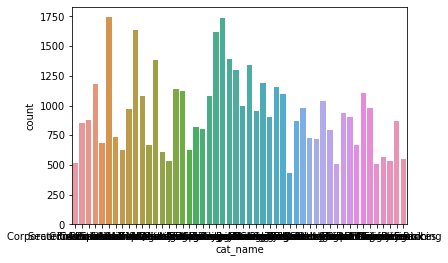

In [8]:
sns.countplot(df['cat_name'])

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_func(message):
    Test_punc_removed = [char for char in message if char not in string .punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    
    return Test_punc_removed_join

In [11]:
df['Text-Without-Punctuations_name'] = df['name'].apply(remove_func)
df['Text-Without-Punctuations'] = df['document_text'].apply(remove_func)
df

,id,name,document_text,cat_name,Text-Without-Punctuations_name,Text-Without-Punctuations
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications,Information Regarding the Merger of Navios Mar...,At a special meeting held on March 24 2021 sha...
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement,Announcement on Approving the Change of Member...,On April 2 2021 the China Financial Futures Ex...
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission SFC has ...
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement,Renminbi RMB Haircut February 4 2020,Pursuant to Section 262 of the Clearing House ...
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime,AntiMoney Laundering Countering Financing of T...,Money laundering and terrorism financing MLTF ...
...,...,...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation NSCC ...
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy,Analytical Accounts of the Exchange Fund,On January 14 2020 the Hong Kong Monetary Auth...
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India SEBI on...
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions,Section 19 Letter for Criminal Conviction Pro...,The Federal Reserve Bank of Atlanta Reserve Ba...


In [12]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# AFTER LOOKING AT THE DATA, IT WAS OBSERVED THAT SOME WORDS WERE FREQUENTLY REPEATED, THUS ADDING THEM IN THE STOPWORDS LIST (TO BE REMOVED FROM THE DATASET)
stop_words.extend(['from', 'subject', 'https', 're', 'edu', 'use','will','aap','co','day','user','today','week','year'])

# DEFINING A FUNCTION TO REMOVE STOP WORDS AND SOME SHORT WORDS TOO (LESS THAN 3 CHARACTERS LONG), SINCE THEY DONT GIVE VALUE TO THE DATA

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >=3 and token not in stop_words:
            result.append(token)
    return result

In [16]:
df_new = df['Text-Without-Punctuations_name'].apply(preprocess)
df_new = pd.DataFrame(df_new)
df_new

,Text-Without-Punctuations_name
0,"[information, regarding, merger, navios, marit..."
1,"[announcement, approving, change, membership, ..."
2,"[sfc, suspends, shiu, yau, wah, five, months]"
3,"[renminbi, rmb, haircut, february]"
4,"[antimoney, laundering, countering, financing,..."
...,...
47097,"[guide, nscc, fee, schedule]"
47098,"[analytical, accounts, exchange, fund]"
47099,"[adjudication, order, matter, chiranjilal, vya..."
47100,"[section, letter, criminal, conviction, prohib..."


In [17]:
df2 = df['Text-Without-Punctuations'].apply(preprocess)

In [19]:
df2 = pd.DataFrame(df2)

In [20]:
det = pd.concat([df_new, df2], join = 'outer', axis = 1)

In [21]:
det

,Text-Without-Punctuations_name,Text-Without-Punctuations
0,"[information, regarding, merger, navios, marit...","[special, meeting, held, march, shareholders, ..."
1,"[announcement, approving, change, membership, ...","[april, china, financial, futures, exchange, p..."
2,"[sfc, suspends, shiu, yau, wah, five, months]","[securities, futures, commission, sfc, suspend..."
3,"[renminbi, rmb, haircut, february]","[pursuant, section, clearing, house, procedure..."
4,"[antimoney, laundering, countering, financing,...","[money, laundering, terrorism, financing, mltf..."
...,...,...
47097,"[guide, nscc, fee, schedule]","[national, securities, clearing, corporation, ..."
47098,"[analytical, accounts, exchange, fund]","[january, hong, kong, monetary, authority, hkm..."
47099,"[adjudication, order, matter, chiranjilal, vya...","[securities, exchange, board, india, sebi, rec..."
47100,"[section, letter, criminal, conviction, prohib...","[federal, reserve, bank, atlanta, reserve, ban..."


In [23]:
det1 =pd.DataFrame(det['Text-Without-Punctuations_name'].apply(lambda x: " ".join(x))) 
det1

,Text-Without-Punctuations_name
0,information regarding merger navios maritime c...
1,announcement approving change membership futur...
2,sfc suspends shiu yau wah five months
3,renminbi rmb haircut february
4,antimoney laundering countering financing terr...
...,...
47097,guide nscc fee schedule
47098,analytical accounts exchange fund
47099,adjudication order matter chiranjilal vyas nam...
47100,section letter criminal conviction prohibition...


In [25]:
det2 =pd.DataFrame(det['Text-Without-Punctuations'].apply(lambda x: " ".join(x))) 
det2

,Text-Without-Punctuations
0,special meeting held march shareholders navios...
1,april china financial futures exchange publish...
2,securities futures commission sfc suspended sh...
3,pursuant section clearing house procedures hkf...
4,money laundering terrorism financing mltf fina...
...,...
47097,national securities clearing corporation nscc ...
47098,january hong kong monetary authority hkma rele...
47099,securities exchange board india sebi receipt a...
47100,federal reserve bank atlanta reserve bank beco...


In [26]:
det3 = pd.concat([det1,det2], join = 'outer', axis = 1)
det3

,Text-Without-Punctuations_name,Text-Without-Punctuations
0,information regarding merger navios maritime c...,special meeting held march shareholders navios...
1,announcement approving change membership futur...,april china financial futures exchange publish...
2,sfc suspends shiu yau wah five months,securities futures commission sfc suspended sh...
3,renminbi rmb haircut february,pursuant section clearing house procedures hkf...
4,antimoney laundering countering financing terr...,money laundering terrorism financing mltf fina...
...,...,...
47097,guide nscc fee schedule,national securities clearing corporation nscc ...
47098,analytical accounts exchange fund,january hong kong monetary authority hkma rele...
47099,adjudication order matter chiranjilal vyas nam...,securities exchange board india sebi receipt a...
47100,section letter criminal conviction prohibition...,federal reserve bank atlanta reserve bank beco...


In [28]:
df.head(10)

,id,name,document_text,cat_name,Text-Without-Punctuations_name,Text-Without-Punctuations
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications,Information Regarding the Merger of Navios Mar...,At a special meeting held on March 24 2021 sha...
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement,Announcement on Approving the Change of Member...,On April 2 2021 the China Financial Futures Ex...
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission SFC has ...
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement,Renminbi RMB Haircut February 4 2020,Pursuant to Section 262 of the Clearing House ...
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime,AntiMoney Laundering Countering Financing of T...,Money laundering and terrorism financing MLTF ...
5,13725,Order Approving Proposed Rule Change Relating ...,"On October 23, 2020, ICE Clear Europe Limited ...",Commodities Trading,Order Approving Proposed Rule Change Relating ...,On October 23 2020 ICE Clear Europe Limited “I...
6,30296,Adjudication Order In Respect of PRB Securitie...,Securities and Exchange Board of India (the SE...,Examinations,Adjudication Order In Respect of PRB Securitie...,Securities and Exchange Board of India the SEB...
7,14814,“Sustainable Finance: The Changing Regulatory ...,"Gerry Cross, Director of Financial Regulation:...",Insurance,“Sustainable Finance The Changing Regulatory L...,Gerry Cross Director of Financial Regulation P...
8,17120,Amendments to the General Regulation Under the...,Amendments to the General Regulation under the...,Required Disclosures,Amendments to the General Regulation Under the...,Amendments to the General Regulation under the...
9,36610,Consumer Protection Airlines Commit To Timely ...,Following dialogues with the Commission and na...,Consumer protection,Consumer Protection Airlines Commit To Timely ...,Following dialogues with the Commission and na...


In [33]:
det4 = pd.get_dummies(df.cat_name)

In [34]:
det5 =  pd.concat([det3,det4], join = 'outer', axis = 1)

In [35]:
det5

,Text-Without-Punctuations_name,Text-Without-Punctuations,Accounting and Finance,Antitrust,Banking,Broker Dealer,Commodities Trading,Compliance Management,Consumer protection,Contract Provisions,...,Required Disclosures,Research,Risk Management,Securities Clearing,Securities Issuing,Securities Management,Securities Sales,Securities Settlement,Trade Pricing,Trade Settlement
0,information regarding merger navios maritime c...,special meeting held march shareholders navios...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,announcement approving change membership futur...,april china financial futures exchange publish...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,sfc suspends shiu yau wah five months,securities futures commission sfc suspended sh...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,renminbi rmb haircut february,pursuant section clearing house procedures hkf...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,antimoney laundering countering financing terr...,money laundering terrorism financing mltf fina...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47097,guide nscc fee schedule,national securities clearing corporation nscc ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47098,analytical accounts exchange fund,january hong kong monetary authority hkma rele...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47099,adjudication order matter chiranjilal vyas nam...,securities exchange board india sebi receipt a...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47100,section letter criminal conviction prohibition...,federal reserve bank atlanta reserve bank beco...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
det6 = pd.DataFrame(df.id)

In [39]:
det7 = pd.concat([det6,det5], join = 'outer', axis = 1)

In [104]:
det7.shape

(47102, 51)

In [ ]:
det7 = det7.drop(['Text-Without-Punctuations_name','Text-Without-Punctuations'],axis=1)

In [49]:
det8 = det7.groupby('id')

In [76]:
det8.groups

{4772: [1602, 3140, 18990, 19426, 25482, 34021, 35643], 4774: [14484, 31363, 38229, 43425], 4775: [12670, 16780, 17512, 21115, 29725, 36377, 37819, 39228], 4776: [1416, 9025, 20532, 45165, 45276], 4778: [14859, 21138, 27524, 38055, 42166], 4779: [2017, 4897, 8189, 11127, 18636, 22189, 30101, 45320], 4780: [206, 2785, 17872, 24074, 32257, 32477], 4781: [723, 1002, 3606, 10175, 14647, 15338, 17406, 21513, 26459, 28029, 31692, 37923, 39740, 40527, 43180], 4782: [1554, 12583, 20098, 24551, 25529, 25994, 26842, 30979, 43512], 4783: [1262, 5456, 7418, 14505, 22138, 28256], 4784: [950, 21704, 28523, 29102, 44663, 44739], 4785: [4929, 9641, 10872, 13487, 24707, 35679, 42448], 4786: [1312, 14476, 15874, 21007, 22035, 35103, 38280, 41885], 4789: [12485, 19296, 29128], 4792: [3867, 10854, 31619, 43714, 44403, 45249], 4793: [5968, 10305, 15050, 22772, 40537], 4797: [3488, 27034], 4798: [4649, 7165, 10225, 24676, 30294], 4799: [1134, 32402], 4801: [12018, 26382, 27663, 29406, 33506, 42668], 4804: [

In [72]:
det8.first()

,Accounting and Finance,Antitrust,Banking,Broker Dealer,Commodities Trading,Compliance Management,Consumer protection,Contract Provisions,Corporate Communications,Corporate Governance,...,Required Disclosures,Research,Risk Management,Securities Clearing,Securities Issuing,Securities Management,Securities Sales,Securities Settlement,Trade Pricing,Trade Settlement
id,,,,,,,,,,,,,,,,,,,,,
4772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4778,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
det9 = pd.DataFrame(det8)

In [93]:
det9

,0,1
0,4772,id Accounting and Finance Antitrust...
1,4774,id Accounting and Finance Antitrust...
2,4775,id Accounting and Finance Antitrust...
3,4776,id Accounting and Finance Antitrust...
4,4778,id Accounting and Finance Antitrust...
...,...,...
9854,57201,id Accounting and Finance Antitrus...
9855,57207,id Accounting and Finance Antitrus...
9856,57234,id Accounting and Finance Antitrus...
9857,57240,id Accounting and Finance Antitrus...


In [95]:
det9[1][2]

,id,Accounting and Finance,Antitrust,Banking,Broker Dealer,Commodities Trading,Compliance Management,Consumer protection,Contract Provisions,Corporate Communications,...,Required Disclosures,Research,Risk Management,Securities Clearing,Securities Issuing,Securities Management,Securities Sales,Securities Settlement,Trade Pricing,Trade Settlement
12670,4775,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16780,4775,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17512,4775,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21115,4775,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29725,4775,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36377,4775,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37819,4775,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39228,4775,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
det8.first()

,Accounting and Finance,Antitrust,Banking,Broker Dealer,Commodities Trading,Compliance Management,Consumer protection,Contract Provisions,Corporate Communications,Corporate Governance,...,Required Disclosures,Research,Risk Management,Securities Clearing,Securities Issuing,Securities Management,Securities Sales,Securities Settlement,Trade Pricing,Trade Settlement
id,,,,,,,,,,,,,,,,,,,,,
4772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4778,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
det10 = det7.groupby('id')

In [103]:
det10.first()

,Accounting and Finance,Antitrust,Banking,Broker Dealer,Commodities Trading,Compliance Management,Consumer protection,Contract Provisions,Corporate Communications,Corporate Governance,...,Required Disclosures,Research,Risk Management,Securities Clearing,Securities Issuing,Securities Management,Securities Sales,Securities Settlement,Trade Pricing,Trade Settlement
id,,,,,,,,,,,,,,,,,,,,,
4772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4778,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
af = pd.read_csv('trainpreprocessed.csv')
af

,Unnamed: 0,id,CONTEXT,Accounting and Finance,Antitrust,Banking,Broker Dealer,Commodities Trading,Compliance Management,Consumer protection,...,Required Disclosures,Research,Risk Management,Securities Clearing,Securities Issuing,Securities Management,Securities Sales,Securities Settlement,Trade Pricing,Trade Settlement
0,0,4772,consent order matter solium financial services...,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4774,alberta securities commission investors top in...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4775,exempt market dealer settlement alberta securi...,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,1
3,3,4776,canadian securities regulators announces consu...,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,4,4778,csa consultation paper consideration access eq...,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854,9854,57201,youre difficulty repaying loans good track rec...,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9855,9855,57207,bank russia restricted exchange trading foreig...,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,1,0,1
9856,9856,57234,application pecuniary administrative sanction ...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9857,9857,57240,investor consultation investor service hotline...,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [106]:
list_of_words = []

for i in af['CONTEXT']:
    for j in i:
        list_of_words.append(j)
        
total_words  = len(set(list_of_words))
total_words

59

In [108]:
x = af['CONTEXT']
x

0       consent order matter solium financial services...
1       alberta securities commission investors top in...
2       exempt market dealer settlement alberta securi...
3       canadian securities regulators announces consu...
4       csa consultation paper consideration access eq...
                              ...                        
9854    youre difficulty repaying loans good track rec...
9855    bank russia restricted exchange trading foreig...
9856    application pecuniary administrative sanction ...
9857    investor consultation investor service hotline...
9858    amendment contract title bursa malaysia palm o...
Name: CONTEXT, Length: 9859, dtype: object

In [109]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

tokenizer = Tokenizer(num_words = total_words)

tokenizer.fit_on_texts(x)

train_sequences = tokenizer.texts_to_sequences(x)

In [111]:
train_sequences

[[12, 4, 21, 4, 21, 23, 13, 3, 7, 7, 53, 52, 5, 23, 5, 5, 12, 7, 7, 7, 12],
 [3, 7, 24, 13, 13, 24, 4, 3, 7, 3],
 [8, 3, 7, 4, 8, 3, 10, 3],
 [3, 45, 47, 3, 33, 49, 8, 50, 22, 3, 6],
 [49, 3, 33, 3, 49, 54, 55, 33, 22, 54, 54, 16, 8, 53, 53, 54, 15],
 [39,
  3,
  9,
  39,
  36,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  54,
  3,
  22,
  13,
  54,
  21,
  3,
  22,
  12,
  21,
  8,
  3,
  22],
 [24, 3, 7, 10, 24, 33, 24, 24, 10, 24, 55, 53, 24, 53, 36, 53],
 [23,
  4,
  21,
  7,
  24,
  23,
  3,
  3,
  7,
  7,
  8,
  9,
  9,
  46,
  36,
  3,
  3,
  3,
  3,
  5,
  23,
  9,
  22,
  5,
  45,
  55,
  3,
  7,
  7,
  3,
  5,
  45,
  3,
  54,
  7,
  41],
 [9, 3, 7, 27, 3, 9, 27, 9, 53, 29, 1, 8, 41, 41],
 [39,
  9,
  26,
  3,
  9,
  26,
  46,
  9,
  36,
  3,
  26,
  26,
  35,
  26,
  12,
  3,
  9,
  26,
  55,
  55,
  39,
  33,
  6,
  40,
  9,
  14,
  12,
  2,
  3,
  7,
  6,
  13,
  2,
  20,
  8,
  50,
  26,
  3,
  3,
  26,
  3,
  3,
  9,
  26,
  9,
  43,
  36,
  3,
  9,
  26,
  3,
  3,

In [150]:
from itertools import chain
flatten_list = list(chain.from_iterable(train_sequences))

In [151]:
flatten_list

[12,
 4,
 21,
 4,
 21,
 23,
 13,
 3,
 7,
 7,
 53,
 52,
 5,
 23,
 5,
 5,
 12,
 7,
 7,
 7,
 12,
 3,
 7,
 24,
 13,
 13,
 24,
 4,
 3,
 7,
 3,
 8,
 3,
 7,
 4,
 8,
 3,
 10,
 3,
 3,
 45,
 47,
 3,
 33,
 49,
 8,
 50,
 22,
 3,
 6,
 49,
 3,
 33,
 3,
 49,
 54,
 55,
 33,
 22,
 54,
 54,
 16,
 8,
 53,
 53,
 54,
 15,
 39,
 3,
 9,
 39,
 36,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 54,
 3,
 22,
 13,
 54,
 21,
 3,
 22,
 12,
 21,
 8,
 3,
 22,
 24,
 3,
 7,
 10,
 24,
 33,
 24,
 24,
 10,
 24,
 55,
 53,
 24,
 53,
 36,
 53,
 23,
 4,
 21,
 7,
 24,
 23,
 3,
 3,
 7,
 7,
 8,
 9,
 9,
 46,
 36,
 3,
 3,
 3,
 3,
 5,
 23,
 9,
 22,
 5,
 45,
 55,
 3,
 7,
 7,
 3,
 5,
 45,
 3,
 54,
 7,
 41,
 9,
 3,
 7,
 27,
 3,
 9,
 27,
 9,
 53,
 29,
 1,
 8,
 41,
 41,
 39,
 9,
 26,
 3,
 9,
 26,
 46,
 9,
 36,
 3,
 26,
 26,
 35,
 26,
 12,
 3,
 9,
 26,
 55,
 55,
 39,
 33,
 6,
 40,
 9,
 14,
 12,
 2,
 3,
 7,
 6,
 13,
 2,
 20,
 8,
 50,
 26,
 3,
 3,
 26,
 3,
 3,
 9,
 26,
 9,
 43,
 36,
 3,
 9,
 26,
 3,
 3,
 33,
 24,
 54,
 3,
 9,
 26,
 9,
 3,
 1,
 

In [112]:
af.columns

Index(['Unnamed: 0', 'id', 'CONTEXT', 'Accounting and Finance', 'Antitrust',
       'Banking', 'Broker Dealer', 'Commodities Trading',
       'Compliance Management', 'Consumer protection', 'Contract Provisions',
       'Corporate Communications', 'Corporate Governance', 'Definitions',
       'Delivery', 'Examinations', 'Exemptions', 'Fees and Charges',
       'Financial Accounting', 'Financial Crime', 'Forms', 'Fraud', 'IT Risk',
       'Information Filing', 'Insurance', 'Legal', 'Legal Proceedings',
       'Licensing', 'Licensure and certification', 'Liquidity Risk', 'Listing',
       'Market Abuse', 'Market Risk', 'Monetary and Economic Policy',
       'Money Services', 'Money-Laundering and Terrorist Financing',
       'Natural Disasters', 'Payments and Settlements', 'Powers and Duties',
       'Quotation', 'Records Maintenance', 'Regulatory Actions',
       'Regulatory Reporting', 'Required Disclosures', 'Research',
       'Risk Management', 'Securities Clearing', 'Securities Issu

In [125]:
y = af[['Accounting and Finance', 'Antitrust']]

In [117]:
len(train_sequences)

9859

In [127]:
af_new = af.drop(['Unnamed: 0', 'id', 'CONTEXT'],axis=1)

In [131]:
y = af_new.values

In [133]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [153]:
flatten_list_y = list(chain.from_iterable(y))

In [157]:
len(flatten_list_y)

492950

In [134]:
import lightgbm as lgb

In [135]:
clf = lgb.LGBMClassifier()

In [137]:
clf

LGBMClassifier()

In [156]:
clf.fit(flatten_list,flatten_list_y)

ValueError: Expected 2D array, got 1D array instead:
array=[12  4 21 ...  9  7 18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.